In [ ]:
import os
from google.colab import files
texts =files.upload()

Saving googleplaystore1.csv to googleplaystore1.csv


In [ ]:
#import pandas and numpy
import pandas as pd
import numpy as np
df = pd.read_csv(r"googleplaystore1.csv")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plot
from datetime import datetime, date

In [ ]:
#display the dataset
#before data cleaning
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87865,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,45433,25M,500000+,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,"Bleacher Report: sports news, scores, & highli...",SPORTS,4.4,23829,Varies with device,"5,000,000+",Free,0,Everyone 10+,Sports,"July 20, 2018",Varies with device,Varies with device
1556,Hovercraft Racer,SPORTS,4.0,218,28M,"100,000+",Free,0,Everyone,Sports,"July 19, 2018",5,4.1 and up
1557,World Cup 2018,SPORTS,4.6,4011,2.6M,"500,000+",Free,0,Teen,Sports,"July 1, 2018",1.0.16,2.3 and up
1558,GollerCepte 1903,SPORTS,4.7,25172,30M,"500,000+",Free,0,Everyone,Sports,"May 23, 2018",5.5,4.1 and up


Data Cleaning

In [ ]:
df=df.replace(['Varies with device'],np.NaN)

In [ ]:
#we drop unecessary columns
df=df.drop(['Category'],axis=1)
df=df.drop(['Current Ver'],axis=1)

In [ ]:
#shows the total number of missing values
df.isnull().sum()

App                 0
Rating             73
Reviews             0
Size              400
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Android Ver       320
dtype: int64

In [ ]:
mean1= df['Rating'].mean()
mean1

4.29179556153329

In [ ]:
#replace the null values with the mean of the column
df['Rating']=df['Rating'].replace(np.NaN,mean1)

In [ ]:
mode2= df['Android Ver'].mode()
mode2

0    4.1 and up
dtype: object

In [ ]:
#we replace some columns with their mode due their characteristics
df['Android Ver']=df['Android Ver'].replace(np.NaN,'4.1 and up')

In [ ]:
#remove unwanted parts of a string in a column
df['Size'] = df['Size'].str.replace(r'\D', '')
df['Installs'] = df['Installs'].str.replace(r'\D', '')
df['Price'] = df['Price'].str.replace(r'\D', '')

In [ ]:
mode1= df['Size'].mode()
mode1

0    14
dtype: object

In [ ]:
#we replace some columns with their mode due their characteristics
df['Size']=df['Size'].replace(np.NaN,14)

In [ ]:
#convert the columns to integer values
df['Size'] = df['Size'].astype(int)
df['Installs'] = df['Installs'].astype(int)
df['Price'] = df['Price'].astype(int)

In [ ]:
meanR= df['Reviews'].mean()
meanR

427348.54038461536

In [ ]:
st = df['Rating'].std()
st

0.3643510718529953

In [ ]:
df.mean()

Rating      4.291796e+00
Reviews     4.273485e+05
Size        3.663462e+01
Installs    2.719844e+07
Price       4.831218e+01
dtype: float64

In [ ]:
from datetime import datetime
for i in range(0,1560):
  df.at[i,'Last Updated'] = datetime.strptime(df.at[i,'Last Updated'], '%B %d, %Y')
df['Last Updated']

0       2018-01-07 00:00:00
1       2018-01-15 00:00:00
2       2018-08-01 00:00:00
3       2018-06-08 00:00:00
4       2018-06-20 00:00:00
               ...         
1555    2018-07-20 00:00:00
1556    2018-07-19 00:00:00
1557    2018-07-01 00:00:00
1558    2018-05-23 00:00:00
1559    2018-08-01 00:00:00
Name: Last Updated, Length: 1560, dtype: object

In [ ]:
#after data cleaning
df

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,4.0.3 and up
1,Coloring book moana,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87865,87,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,4.0.3 and up
3,Sketch - Draw & Paint,4.5,45433,25,500000,Free,0,Teen,Art & Design,2018-06-08 00:00:00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,28,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
1555,"Bleacher Report: sports news, scores, & highli...",4.4,23829,14,5000000,Free,0,Everyone 10+,Sports,2018-07-20 00:00:00,4.1 and up
1556,Hovercraft Racer,4.0,218,28,100000,Free,0,Everyone,Sports,2018-07-19 00:00:00,4.1 and up
1557,World Cup 2018,4.6,4011,26,500000,Free,0,Teen,Sports,2018-07-01 00:00:00,2.3 and up
1558,GollerCepte 1903,4.7,25172,30,500000,Free,0,Everyone,Sports,2018-05-23 00:00:00,4.1 and up


In [ ]:
#Data Analysing 
df['Genres'].value_counts()

Medical                      170
Communication                141
Education                    129
Business                      80
Finance                       79
                            ... 
Educational;Creativity         1
Entertainment;Creativity       1
Role Playing;Pretend Play      1
Simulation;Pretend Play        1
Board                          1
Name: Genres, Length: 66, dtype: int64

In [ ]:
df['Content Rating'].value_counts()

Everyone           1255
Teen                135
Mature 17+          128
Everyone 10+         41
Adults only 18+       1
Name: Content Rating, dtype: int64

In [ ]:
df['Installs'].value_counts()

1000000       298
100000        251
10000000      205
5000000       157
500000        133
10000         127
100000000      71
50000          70
1000           57
50000000       52
100            30
5000           27
1000000000     21
500            17
500000000      17
10             14
50              6
5               5
1               2
Name: Installs, dtype: int64

In [ ]:
df['Type'].value_counts()

Free    1473
Paid      87
Name: Type, dtype: int64

Graph Visualisation

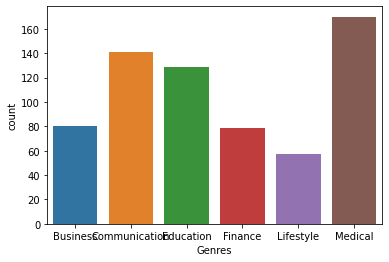

In [ ]:
genres=('Communication','Education','Medical','Business','Finance','Lifestyle')
data1=df.loc[df['Genres'].isin(genres)]
sns.countplot(x='Genres',data=data1)

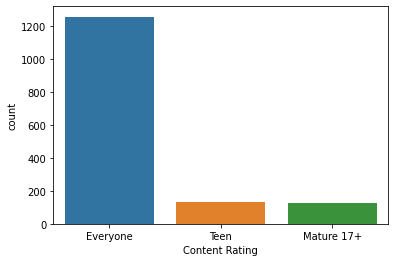

In [ ]:
content=('Everyone','Teen','Mature 17+','Everyone')
data2=df.loc[df['Content Rating'].isin(content)]
sns.countplot(x='Content Rating',data=data2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

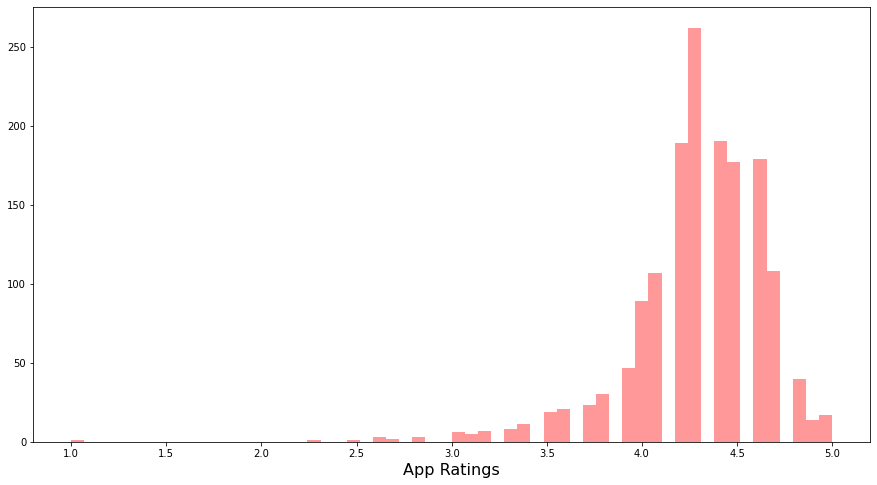

In [ ]:
x=df['Rating']
plot.figure(figsize=(15,8))
ax=sns.distplot(x,bins=58,kde=False, color='r')
ax.set_xlabel(xlabel='App Ratings',fontsize = 16)
plot.show

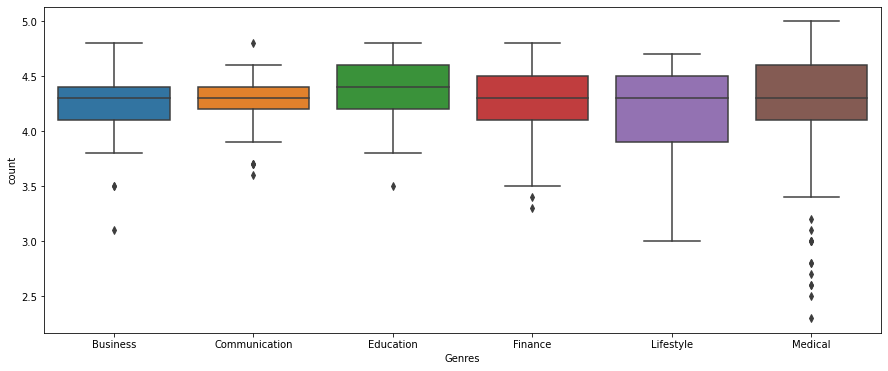

In [ ]:
genres=('Communication','Education','Medical','Business','Finance','Lifestyle')
genres1=('Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated')
d1=df.loc[df['Genres'].isin(genres) & df['Rating']]
plot.rcParams['figure.figsize']=(15,6)
ax= sns.boxplot(x=d1['Genres'],y=d1['Rating'])
ax.set_xlabel(xlabel='Genres')
ax.set_ylabel(ylabel='count')
#plot.xticks(rotation=90)
plot.show()

In [ ]:
#the boxplot shows some outliers. But since the data is completely random we cannot expect the data to lie inside the interquartile range 

Normalisation And Standardisation

In [ ]:
#we standardise the data here
#standardiser is used here to scale down the data for easy analysation
df_std=df.copy()
for i in df_std.columns[1:5]:
  df_std[i]=(df_std[i]-df_std[i].mean())/df_std[i].std()
df_std.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.526403,-0.160402,-0.327772,-0.214871,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,4.0.3 and up
1,Coloring book moana,-1.075324,-0.160099,-0.420707,-0.210999,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.120360,-0.127470,0.936135,-0.175435,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,4.0.3 and up
3,Sketch - Draw & Paint,0.571439,-0.143403,-0.216251,-0.210999,Free,0,Teen,Art & Design,2018-06-08 00:00:00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,0.022518,-0.160099,-0.160490,-0.214160,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,4.4 and up


In [ ]:
for i in df_std.columns[6:7]:
  df_std[i]=(df_std[i]-df_std[i].mean())/df_std[i].std()
df_std.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.526403,-0.160402,-0.327772,-0.214871,Free,-0.149633,Everyone,Art & Design,2018-01-07 00:00:00,4.0.3 and up
1,Coloring book moana,-1.075324,-0.160099,-0.420707,-0.210999,Free,-0.149633,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.120360,-0.127470,0.936135,-0.175435,Free,-0.149633,Everyone,Art & Design,2018-08-01 00:00:00,4.0.3 and up
3,Sketch - Draw & Paint,0.571439,-0.143403,-0.216251,-0.210999,Free,-0.149633,Teen,Art & Design,2018-06-08 00:00:00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,0.022518,-0.160099,-0.160490,-0.214160,Free,-0.149633,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,4.4 and up


In [ ]:
#normalisation
#convert mean to 0
df_std.mean().round(decimals=1)

Rating      0.0
Reviews    -0.0
Size        0.0
Installs   -0.0
Price      -0.0
dtype: float64

In [ ]:
#convert std to 1
df_std.var()

Rating      1.0
Reviews     1.0
Size        1.0
Installs    1.0
Price       1.0
dtype: float64

In [ ]:
from sklearn import preprocessing
x_array = np.array(df['Rating'])
normalized_X = preprocessing.normalize([x_array])
normalized_X

array([[0.02410039, 0.02292476, 0.02762728, ..., 0.02703947, 0.02762728,
        0.02527602]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

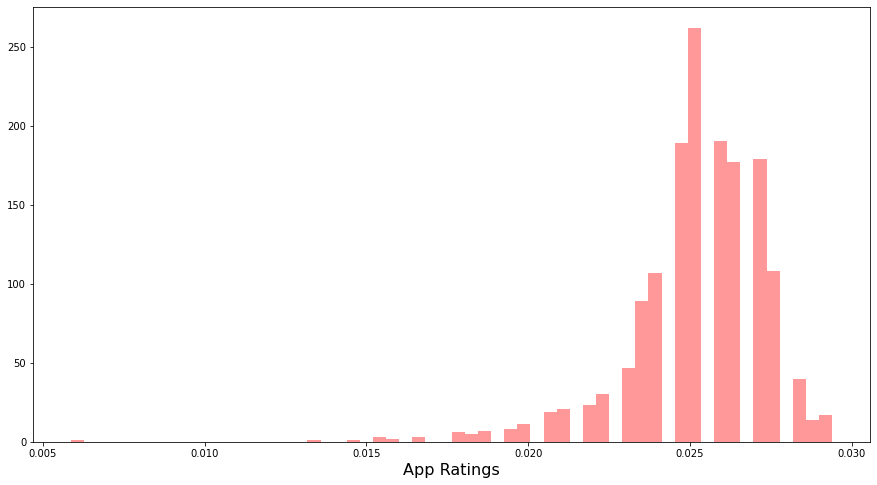

In [ ]:
x=normalized_X
plot.figure(figsize=(15,8))
ax=sns.distplot(x,bins=58,kde=False, color='r')
ax.set_xlabel(xlabel='App Ratings',fontsize = 16)
plot.show

Hypothesis Testing

In [ ]:
#Its the process in which the analyst tests an assumption regarding a population parameter.
from scipy.stats import norm
from math import sqrt
def one_sided_hypo(sample_mean,pop_mean,std_dev,sample_size,alpha):
  actual_z=abs(norm.ppf(alpha))
  hypo_z=(sample_mean-pop_mean)/(std_dev/sqrt(sample_size))
  print("actual z value :",actual_z)
  print("hypothesis z value :",hypo_z,'\n')
  if hypo_z >= actual_z:
    return True
  else:
    return False


In [ ]:
#we predict that the medical apps have a rating of less than 4.5
pop_mean = 4.5
alpha = 0.05
sample_size=170
print('H0 : u >=',pop_mean)
print('H1 : u <',pop_mean)
print('alpha value is :',alpha,'\n')
reject = one_sided_hypo(mean1,pop_mean,st,sample_size,alpha)
if (reject == True):
  print("Null hypothesis is accepted")
else:
  print("Null hypothesis is Rejected")

H0 : u >= 4.5
H1 : u < 4.5
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -7.450653948253982 

Null hypothesis is Rejected


In [ ]:
#from the above results, we can conclude that the null hypothesis is rejected and so we take the alternate hypothesis
#Hence, medical apps have a rating of less than 4.5

Correlation

In [ ]:
#Correlation is a statistical measure that expresses the extent to which 2 variables are linearly related,i.e they can change together at a constant rate.   
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.023695,-0.004535,0.004717,-0.029171
Reviews,0.023695,1.000000,-0.035129,0.466206,-0.023936
Size,-0.004535,-0.035129,1.000000,-0.055598,0.049533
Installs,0.004717,0.466206,-0.055598,1.000000,-0.032052
Price,-0.029171,-0.023936,0.049533,-0.032052,1.000000


In [ ]:
np.corrcoef(df['Reviews'],df['Installs'],rowvar=True)
#Highest Correlation

array([[1.        , 0.46620551],
       [0.46620551, 1.        ]])

In [ ]:
np.corrcoef(df['Size'],df['Installs'],rowvar=True)
#Lowest Correlation

array([[ 1.        , -0.05559839],
       [-0.05559839,  1.        ]])

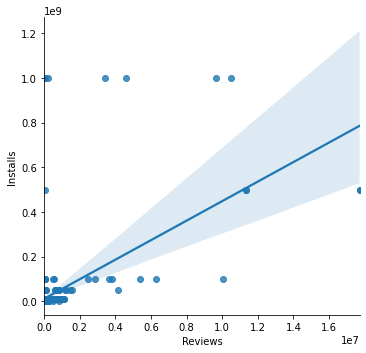

In [ ]:
#positive scattterlot
#a positive correlation, this occurs when value of both the variable increases as they depend on the others
sns.lmplot(x='Reviews', y='Installs',data=df.sample(500))
plot.show()

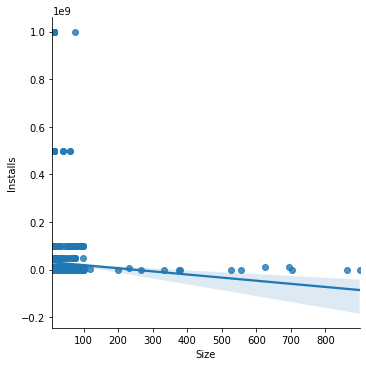

In [ ]:
#negative scatterplot
#a negative correlation, this occurs when value of 1 variable increases and the other decreases as depending on the others.
sns.lmplot(x='Size', y='Installs',data=df)
plot.show()

In [ ]:
from google.colab import files
df.to_csv('app.csv') 
files.download('app.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>